In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [3]:
#Reading the data
data = pd.read_csv('mushroom_dataset.csv')

#printig the top 5 observations
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,class
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,smooth,white,white,partial,white,one,pendant,black,scattered,poisonous
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,smooth,white,white,partial,white,one,pendant,brown,numerous,edible
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,smooth,white,white,partial,white,one,pendant,brown,numerous,edible
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,smooth,white,white,partial,white,one,pendant,black,scattered,poisonous
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,edible


##### Cap-Shape:
The cap shape of the mushroom can be bell, conical, convex, flat, knobbed, or sunken.

##### Cap-Surface:
The surface of the mushroom's cap can be fibrous, grooved, scaly, or smooth.

##### Cap-Color: 
The cap of the mushroom can have various colors including brown, buff, cinnamon, gray, green, pink, purple, red, white, or yellow.

##### Bruises:
The mushroom can either bruise or not bruise when damaged.

##### Odor:
The mushroom can have different odors such as almond, anise, creosote, fishy, foul, musty, none, pungent, or spicy.

##### Gill-attachment:
The gills of the mushroom can be attached, descending, free, or notched.

##### Gill-Spacing:
The gills of the mushroom can be either close, crowded, or distant from each other.

##### Gill-Size:
The gills of the mushroom can be broad or narrow.

##### Gill-Color:
The color of the mushroom's gills can vary, including black, brown, buff, chocolate, gray, green, orange, pink, purple, red, white, or yellow.

##### Stalk-Shape:
The stalk of the mushroom can be enlarging or tapering.

##### Stalk-Root:
The root structure of the mushroom's stalk can be bulbous, club, cup, equal, rhizomorphs, rooted, or missing.

##### Stalk Surface above the ring:
The surface of the mushroom's stalk above the ring can be fibrous, scaly, silky, or smooth.

##### Stalk Surface below the ring:
The surface of the mushroom's stalk below the ring can be fibrous, scaly, silky, or smooth.

##### Stalk color above the Ring:
The color of the mushroom's stalk above the ring can be brown, buff, cinnamon, gray, orange, pink, red, white, or yellow.

##### Stalk color below the Ring:
The color of the mushroom's stalk below the ring can be brown, buff, cinnamon, gray, orange, pink, red, white, or yellow.

##### Veil-type:
The type of veil covering the gills can be partial or universal.

##### Veil-Color:
The color of the veil covering the gills can be brown, orange, white, or yellow.

##### Ring Number:
The mushroom can have no ring, one ring, or two rings.

##### Ring-Type:
The type of ring on the mushroom can be cobwebby, evanescent, flaring, large, none, pendant, sheathing, or zone.

##### Spore Print Color:
The color of the spore print left by the mushroom can be black, brown, buff, chocolate, green, orange, purple, white, or yellow.

##### Population:
The mushroom can be found in abundant, clustered, numerous, scattered, several, or solitary populations.

##### Class:
whether the mushroom is edible or Poisonous.

##### Data processing

In [4]:
#shape of the data
data.shape

(8124, 22)

we are having 8124 observations and 22 features(including the label column) in total.

In [5]:
#feature names
data.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'class'],
      dtype='object')

In [6]:
#data types
data.dtypes

cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
class                       object
dtype: object

The entire features are categorical column.

##### Check for Null values

In [7]:
# sum of Null Values
data.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
class                          0
dtype: int64

There 2480 rows as null values in 'stalk-root' column. we are loosing about 30% of the data if we drop the null values, so it is better to fill null values with mode since it is categorical column. 

In [8]:
#filling null values with mode
data['stalk-root'].fillna((data['stalk-root'].mode()),inplace=True)

Since columns are categorical we dont need to treat the outliers.

##### Measures of Central Tendancy
Statistics that reveal a dataset's centre or usual value are known as measures of central tendency. Through the selection of a single representative value, they assist in enumerating and describing the distribution of data. The mean, median, and mode are the three often employed metrics of central tendency.

Mean: The mean is calculated by summing up all the values in the dataset and dividing by the total number of values. It represents the average value and is influenced by extreme values. The mean is appropriate for datasets with a symmetric distribution.

Median: The median is the middle value in a dataset when it is sorted in ascending or descending order. It is not affected by extreme values and is suitable for datasets with skewed distributions or outliers. The median is robust and provides a measure of the central value that divides the data into two equal halves.

Mode : The mode represents the most frequently occurring value or values in a dataset. It is useful for categorical or discrete data where the frequency of different categories or values is important. Unlike the mean and median, the mode can be more than one value or even nonexistent if no value appears more than once.

In [9]:
#find the mode of the Data
mode = data.mode()
mode

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,class
0,convex,scaly,brown,no,none,free,close,broad,buff,tapering,...,smooth,white,white,partial,white,one,pendant,white,several,edible


##### Univariant Analysis

In [10]:
frequency_tables = {}

for column in data.columns:
    frequency_table = data[column].value_counts()
    frequency_tables[column] = frequency_table

# Print the frequency tables
for column, table in frequency_tables.items():
    print(f"Frequency table for {column}:")
    print(table)
    print()

Frequency table for cap-shape:
convex     3656
flat       3152
knobbed     828
bell        452
susken       32
conical       4
Name: cap-shape, dtype: int64

Frequency table for cap-surface:
scaly      3244
smooth     2556
fibrous    2320
grooves       4
Name: cap-surface, dtype: int64

Frequency table for cap-color:
brown       2284
gray        1840
red         1500
yellow      1072
white       1040
buff         168
pink         144
cinnamon      44
purple        16
green         16
Name: cap-color, dtype: int64

Frequency table for bruises:
no         4748
bruises    3376
Name: bruises, dtype: int64

Frequency table for odor:
none        3528
foul        2160
fishy        576
spicy        576
almond       400
anise        400
pungent      256
creosote     192
musty         36
Name: odor, dtype: int64

Frequency table for gill-attachment:
free        7914
attached     210
Name: gill-attachment, dtype: int64

Frequency table for gill-spacing:
close      6812
crowded    1312
Name: gill-

##### Bi_Variante analysis

In [11]:
table_1 = pd.crosstab(index=data['class'], columns=[data['cap-surface'], data['cap-color'], data['cap-surface']])
table_1

cap-surface fibrous                                                  grooves  \
cap-color     brown cinnamon    gray    pink     red   white  yellow   white   
cap-surface fibrous  fibrous fibrous fibrous fibrous fibrous fibrous grooves   
class                                                                          
edible          476       12     536       0     288     224      24       0   
poisonous         8        0     356      32       0      32     332       4   

cap-surface scaly        ...              smooth                         \
cap-color   brown  buff  ... white yellow  brown   buff cinnamon   gray   
cap-surface scaly scaly  ... scaly  scaly smooth smooth   smooth smooth   
class                    ...                                              
edible        432    24  ...   144    224    356     24        4    204   
poisonous     516    12  ...    80    340    496    108        0    128   

cap-surface                              
cap-color     pink    red  white yellow  
cap-surface smooth smooth smooth smooth  
class                                    
edible          28     24    352    152  
poisonous       44    432    204      0  

[2 rows x 26 columns]

In [12]:
table_2 = pd.crosstab(index=data['class'], columns=[data['bruises'], data['odor']])
table_2

bruises   bruises                                no                          \
odor       almond anise foul  none pungent creosote fishy  foul musty  none   
class                                                                         
edible        400   400    0  1952       0        0     0     0     0  1456   
poisonous       0     0  288    80     256      192   576  1872    36    40   

bruises          
odor      spicy  
class            
edible        0  
poisonous   576

In [13]:
table_3 = pd.crosstab(index=[data['gill-attachment'], data['gill-spacing'], data['gill-size'], data['gill-color']], columns=data['class'])
table_3

class                                              edible  poisonous
gill-attachment gill-spacing gill-size gill-color                   
attached        close        broad     brown           64          0
                                       orange          64          0
                                       white            0          9
                                       yellow          64          9
free            close        broad     black          128          0
                                       brown          624          0
                                       chocolate        0        528
                                       gray           128        456
                                       green            0         24
                                       pink           496        528
                                       purple         432          0
                                       red             96          0
                                       white          768        129
                                       yellow           0          9
                             narrow    black           24         64
                                       brown           24         88
                                       buff             0       1728
                                       chocolate       12          0
                                       gray            24         24
                                       pink            36         88
                                       purple          12         24
                                       white           12         96
                crowded      broad     black          192          0
                                       brown          192          0
                                       chocolate      192          0
                                       gray            96          0
                                       pink           288          0
                                       white           96          0
                             narrow    brown           32         24
                                       gray             0         24
                                       pink            32         24
                                       purple           0         24
                                       white           80         12
                                       yellow           0          4

In [14]:
table_4 = pd.crosstab(index=[data['stalk-shape'], data['stalk-root']], columns=data['class'])
table_4

class                   edible  poisonous
stalk-shape stalk-root                   
enlarging   bulbous         96       1568
            club           512         44
            equal           96        256
            rooted         192          0
tapering    bulbous       1824        288
            equal          768          0

In [15]:
table_5 = pd.crosstab(index=[data['stalk-surface-above-ring'], data['stalk-surface-below-ring']], columns=data['class'])
table_5

class                                              edible  poisonous
stalk-surface-above-ring stalk-surface-below-ring                   
fibrous                  fibrous                      204         72
                         smooth                       204         72
scaly                    scaly                         16          8
silky                    scaly                          0         68
                         silky                         72       1728
                         smooth                        72        432
smooth                   fibrous                      252         72
                         scaly                        192          0
                         silky                         72        432
                         smooth                      3124       1032

In [16]:
table_6 = pd.crosstab(index=[data['stalk-color-above-ring'], data['stalk-color-above-ring']], columns=data['class'])
table_6

,class,edible,poisonous
stalk-color-above-ring,stalk-color-above-ring,,
brown,brown,16,432
buff,buff,0,432
cinnamon,cinnamon,0,36
gray,gray,576,0
orange,orange,192,0
pink,pink,576,1296
red,red,96,0
white,white,2752,1712
yellow,yellow,0,8


In [17]:
table_7 = pd.crosstab(index=[data['veil-type'], data['veil-color']], columns=data['class'])
table_7

class                 edible  poisonous
veil-type veil-color                   
partial   brown           96          0
          orange          96          0
          white         4016       3908
          yellow           0          8

In [18]:
table_8 = pd.crosstab(index=[data['ring-number'], data['ring-type']], columns=data['class'])
table_8

class                   edible  poisonous
ring-number ring-type                    
none        none             0         36
one         evanescent     816       1768
            flaring         48          0
            large            0       1296
            pendant       2816        744
two         evanescent     192          0
            pendant        336         72

In [19]:
table_9 = pd.crosstab(index=[data['spore-print-color'], data['population']], columns=data['class'])
table_9

class                         edible  poisonous
spore-print-color population                   
black             abundant       192          0
                  numerous       128          0
                  scattered      368        112
                  several        456        112
                  solitary       504          0
brown             abundant       192          0
                  clustered       24          0
                  numerous       128          0
                  scattered      368        112
                  several        528        112
                  solitary       504          0
buff              clustered       24          0
                  several         24          0
chocolate         scattered        0        144
                  several         24        792
                  solitary        24        648
green             several          0         72
orange            clustered       24          0
                  several         24          0
purple            several         48          0
white             clustered      192         52
                  numerous       144          0
                  scattered      144          0
                  several         64       1760
                  solitary        32          0
yellow            clustered       24          0
                  several         24          0

In [20]:
#creating the copy of the data for further use
df = data.copy()
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,class
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,smooth,white,white,partial,white,one,pendant,black,scattered,poisonous
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,smooth,white,white,partial,white,one,pendant,brown,numerous,edible
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,smooth,white,white,partial,white,one,pendant,brown,numerous,edible
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,smooth,white,white,partial,white,one,pendant,black,scattered,poisonous
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,edible


In [21]:
#label encoding
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each categorical column and encode its values
for column in data:
    data[column] = label_encoder.fit_transform(data[column])

In [22]:
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,class
0,2,3,0,0,7,1,0,1,0,0,...,3,7,7,0,2,1,4,0,3,1
1,2,3,9,0,0,1,0,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,3,8,0,1,1,0,0,1,0,...,3,7,7,0,2,1,4,1,2,0
3,2,2,8,0,7,1,0,1,1,0,...,3,7,7,0,2,1,4,0,3,1
4,2,3,3,1,6,1,1,0,0,1,...,3,7,7,0,2,1,0,1,0,0


In [23]:
#performing chi sqaure test to get the feature significance
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['cap-shape'], data['class'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the chi-square statistic and p-value
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

Chi-square statistic: 489.91995361895573
p-value: 1.196456568593578e-103


In [24]:
X = data.iloc[:,0:-1]
y = data['class']

In [25]:
#importing lib to select feature for dataset 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# calculating the chi square score of each coloumn 

best_feature = SelectKBest(score_func=chi2,k=10)
fit = best_feature.fit(X,y)
dataset_scores = pd.DataFrame(fit.scores_)
dataset_cols = pd.DataFrame(X.columns) 

In [26]:
#creating the data frame for chi square scores
scores = pd.concat([dataset_cols,dataset_scores],axis=1)
scores.columns=['column','scores']
scores

,column,scores
0,cap-shape,105.377849
1,cap-surface,226.305540
2,cap-color,76.156142
3,bruises,849.174461
4,odor,50.293912
5,gill-attachment,3.505447
6,gill-spacing,826.795274
7,gill-size,1636.606833
8,gill-color,1401.345160
9,stalk-shape,36.594105


In [27]:
# extracting top 10 feature of dataset 
scores.nlargest(10,'scores')

,column,scores
19,spore-print-color,5713.529406
18,ring-type,1950.610146
7,gill-size,1636.606833
8,gill-color,1401.345160
3,bruises,849.174461
6,gill-spacing,826.795274
13,stalk-color-above-ring,477.500664
14,stalk-color-below-ring,436.232423
10,stalk-root,425.896927
20,population,311.766736


In [28]:
#final features
features = data[['bruises', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-root', 'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-type', 'spore-print-color', 'population']]
label = data['class']

In [29]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size =0.3, random_state=42)

In [30]:
#shape of train and test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5686, 10), (2438, 10), (5686,), (2438,))

#### KNN Clasifier

In [31]:
#training the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [32]:
#predecting based on train values
knn_train_preds = knn.predict(X_train)
knn_train_preds

array([1, 0, 1, ..., 0, 1, 0])

In [33]:
# Calculating the precision for train data
knn_train_precision = precision_score(y_train,knn_train_preds )
knn_train_precision

1.0

In [34]:
#AUC for train_preds
knn_train_AUC = roc_auc_score(y_train, knn_train_preds)
knn_train_AUC

1.0

In [35]:
#predecting based on the test values
knn_test_preds = knn.predict(X_test)
knn_test_preds

array([0, 1, 1, ..., 1, 0, 0])

In [36]:
# Calculating the precision for test data
knn_test_precision = precision_score(y_test, knn_test_preds )
knn_test_precision

1.0

In [37]:
#AUC for test_preds
knn_test_AUC = roc_auc_score(y_test,knn_test_preds)
knn_test_AUC

1.0

In [38]:
#calculating the train and test difference
knn_diff = knn_test_AUC - knn_train_AUC
knn_diff

0.0

#### Logistic Regression

In [39]:
# Create a logistic regression model
model = LogisticRegression()

In [40]:
# Fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression()

In [41]:
# Predict the target variable for the train data
Lr_train_preds = model.predict(X_train)
Lr_train_preds

array([1, 0, 1, ..., 0, 1, 0])

In [42]:
# Calculating the precision for train data
Lr_train_precision = precision_score(y_train, Lr_train_preds )
Lr_train_precision

0.945280940139552

In [43]:
#AUC for train_preds
lr_train_AUC = roc_auc_score(y_train,Lr_train_preds)
lr_train_AUC

0.9453210481744174

In [44]:
# Predict the target variable for the test data
Lr_test_preds = model.predict(X_test)
Lr_test_preds

array([0, 1, 1, ..., 1, 0, 0])

In [45]:
# Calculating the precision for test data
Lr_test_precision = precision_score(y_test, Lr_test_preds )
Lr_test_precision

0.9434599156118143

In [46]:
#AUC for train_preds
lr_test_AUC = roc_auc_score(y_test,Lr_test_preds)
lr_test_AUC

0.9466769326319605

In [47]:
#calculating the train and test difference
lr_diff = lr_test_AUC - lr_train_AUC
lr_diff

0.0013558844575430884

#### Decision Tree

In [48]:
# Create the decision tree classifier
D_T = DecisionTreeClassifier(criterion='gini')

In [49]:
# Fit the classifier to the training data
D_T.fit(X_train, y_train)

DecisionTreeClassifier()

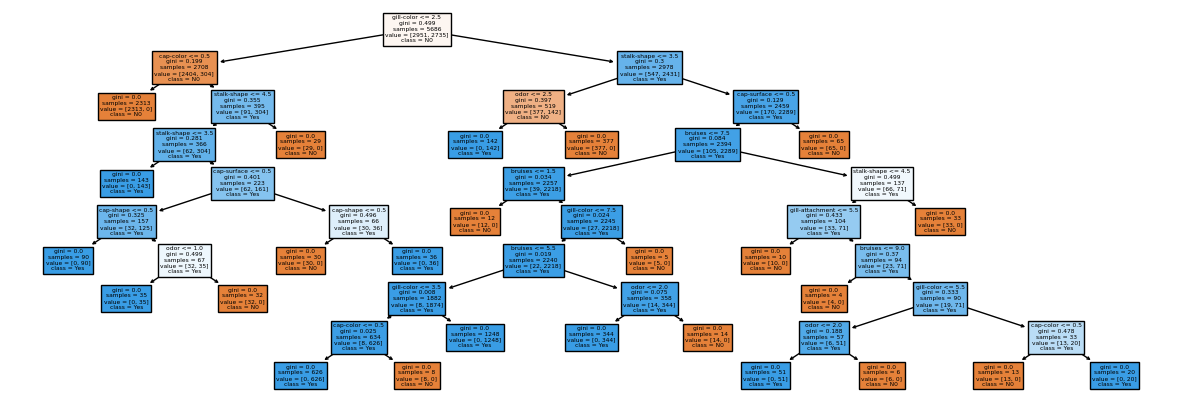

In [50]:
# Plot the decision tree
plt.figure(figsize=(15,5), dpi=100)
plot_tree(D_T, feature_names=X.columns, class_names=['N0','Yes'], filled=True);

In [51]:
# Predict the labels for the train set
DT_train_preds = D_T.predict(X_train)
DT_train_preds

array([1, 0, 1, ..., 0, 1, 0])

In [52]:
# Calculating the precision for train data
DT_train_precision = precision_score(y_train, DT_train_preds )
DT_train_precision

1.0

In [53]:
#AUC for train_preds
DT_train_AUC = roc_auc_score(y_train,DT_train_preds)
DT_train_AUC

1.0

In [54]:
# Predict the labels for the test set
DT_test_preds = D_T.predict(X_test)
DT_test_preds

array([0, 1, 1, ..., 1, 0, 0])

In [55]:
# Calculating the precision for test data
DT_test_precision = precision_score(y_test, DT_test_preds )
DT_test_precision

1.0

In [56]:
#AUC for test_preds
DT_test_AUC = roc_auc_score(y_test,DT_test_preds)
DT_test_AUC

1.0

In [57]:
#calculating the train and test difference
DT_diff = DT_test_AUC - DT_train_AUC
DT_diff

0.0

##### Observations:
->  Out 3 Models Desicion Tree is giving the highest Accuracy in terms of AUC.